# <center>L2 Computational Physics</center>
---

## Random Walks

This assignment will look at some properties of random walks.

In [3]:
import numpy
from matplotlib import pyplot as plt 

To do our work we will implement a walker class. When initialised a list of possible steps is populated. In one dimension it is

[+s] , [-s] 

where s is the step size, it defaults to 1 but can be set as an argument in the constructor. In two dimensions the steps list contains

[ +s , 0 ] , [ -s , 0 ] ,  [ 0 , +s ] , [ 0 , -s ]

At each step the current position of the walker, saved in `self.pos`, is updated by adding one of the possible steps. The function `pickStep` chooses randomly one of the possible steps. Use this function to implement the `doSteps` function that performs `n` steps and returns a `(n+1) x ndim` array representing the trajectory of the walker, including the starting point. 

In [4]:

class walker:
    def __init__(self,x0,ndim=1, step_size=1.0):
        self.pos=x0
        self.ndim=ndim
        self.possibleSteps=[]
        for i in range(ndim):
            step=numpy.zeros(ndim)
            step[i]= - step_size
            self.possibleSteps.append(numpy.array(step,dtype='f'))
            step[i]= + step_size
            self.possibleSteps.append(step.copy())
        self.npossible=len(self.possibleSteps)

    def pickStep(self):
        istep = numpy.random.choice(range(self.npossible))
        return self.possibleSteps[istep]
        
    def doSteps(self,n):
        positions=numpy.ndarray((n+1,self.ndim),dtype='f')
        positions[0] = self.pos
        for j in range(1,n+1):
            positions[j] = positions[j-1] + self.pickStep()
        return positions

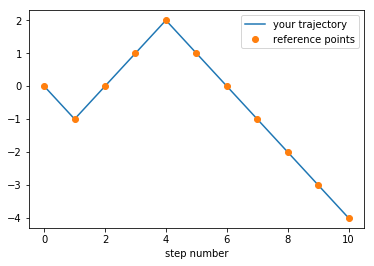

In [5]:
# this test is worth 2 marks
numpy.random.seed(1111)
w = walker(numpy.zeros(1))
pos_test = w.doSteps(10)
reference = [[ 0.], [-1.], [ 0.], [ 1.], [ 2.], [ 1.], [ 0.], [-1.], [-2.], [-3.], [-4.]]
assert len(pos_test)==11
# plots to help debugging
plt.plot(range(11),pos_test, label='your trajectory')
plt.plot(range(11),reference,'o', label='reference points')
plt.legend()
plt.xlabel('step number')
assert (pos_test == reference).all()

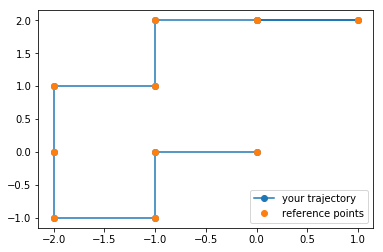

In [6]:
# this test is worth 5 marks
numpy.random.seed(1112)
w = walker(numpy.zeros(2), ndim=2)
pos_test = w.doSteps(10)
reference = numpy.array([[ 0.,  0.], [-1.,  0.], [-1., -1.], [-2., -1.], 
             [-2.,  0.], [-2.,  1.], [-1.,  1.], [-1.,  2.], 
             [ 0.,  2.], [ 1.,  2.], [ 0.,  2.]])
assert pos_test.shape == (11,2)
# plots to help debugging
plt.plot(pos_test[:,0], pos_test[:,1],'-o', label='your trajectory')
plt.plot(reference[:,0],reference[:,1],'o', label='reference points')
plt.legend()
assert (pos_test == reference).all()

This is a plot to visualise trajectories. Use it to convince yourself that you get different trajectories.

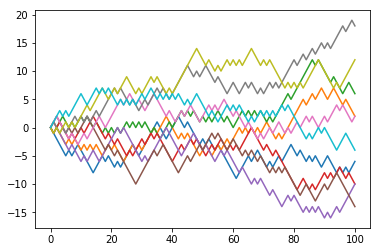

In [7]:
nsteps = 100
for i in range(10):
    w = walker(numpy.zeros(1))
    ys = w.doSteps(nsteps)
    plt.plot(range(nsteps+1),ys)

**Task 1**

Make a plot of average position and average squared position of 100 1D walkers using 1000 steps. Your plot needs a legend, title and labels. [5 marks]


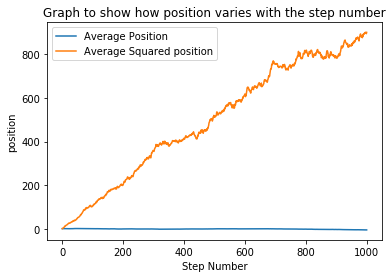

In [11]:
nsteps = 1000
ndim = 1
nwalkers = 100
w= walker(numpy.zeros(1))
all_positions = numpy.zeros((nwalkers , nsteps+1))
avg_positions = numpy.zeros((nsteps+1))
sq_positions = numpy.zeros((nsteps+1))

for i in range(0, nwalkers):
    track = w.doSteps(nsteps).T
    all_positions[i] = track
for j in range(0,nsteps+1):
    x=numpy.sum(all_positions[0:nwalkers,j])/nwalkers
    avg_positions[j] = x
for k in range(0,nsteps+1):
    squares = numpy.zeros((nwalkers))
    for l in range(0,nwalkers):
        squares[l] = all_positions[l,k]**2
    xs = numpy.sum(squares)/nwalkers
    sq_positions[k]=xs
plt.plot(range(nsteps+1), avg_positions, label = 'Average Position')
plt.plot(range(nsteps+1), sq_positions, label = 'Average Squared position')
plt.xlabel('Step Number')
plt.ylabel('position')
plt.title('Graph to show how position varies with the step number')
plt.legend()

**Task 2**

Make a plot to show that the average squared distance scaling is independent of the dimension in which the walker moves. Use 100 steps and 400 walkers and use $D=1,2,3,4$. The plot should have a title, legend and labels. [5 marks]


Text(0,0.5,'Average squared distance')

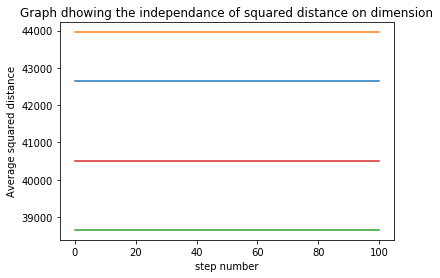

In [19]:
nsteps = 100
nwalkers = 400
dimensions = range(1,5)
distance= numpy.zeros((4,nsteps+1))
all_positions = numpy.zeros((nwalkers,nsteps+1))
avg_positions = numpy.zeros((4,nsteps+1))
for h in range(1,5):
    w=walker(numpy.zeros(h) , ndim=h)
    for i in range(0,nwalkers):
        track = w.doSteps(nsteps).T
        for j in range(0,nsteps+1):
            squares = numpy.sum(track[0:,j]*track[0:,j])
            all_positions[i,j] = squares
    for k in range(0,nsteps+1):
        avg_positions[h-1,k] = numpy.sum(all_positions[0:,j]) 
plt.plot(range(nsteps+1) , avg_positions[0], label = '1 dimension')
plt.plot(range(nsteps+1) , avg_positions[1], label = '2 dimension')
plt.plot(range(nsteps+1) , avg_positions[2], label = '3 dimension')
plt.plot(range(nsteps+1) , avg_positions[3], label = '4dimension')
plt.title('Graph dhowing the independance of squared distance on dimension')
plt.xlabel('step number')
plt.ylabel('Average squared distance')

## 2D walkers

Use 1000 walkers randomly distributed in the unit square (the positions are given in the array `rand_pos`) simulate the diffusion of particles with step size 0.05. Make a plot of the position of the walkers after 10, 100 and 500 steps. The plots should have labels and titles.

Tip: Use `plt.scatter` and consider using its `alpha` option to make you plot look nicer. [6 marks]


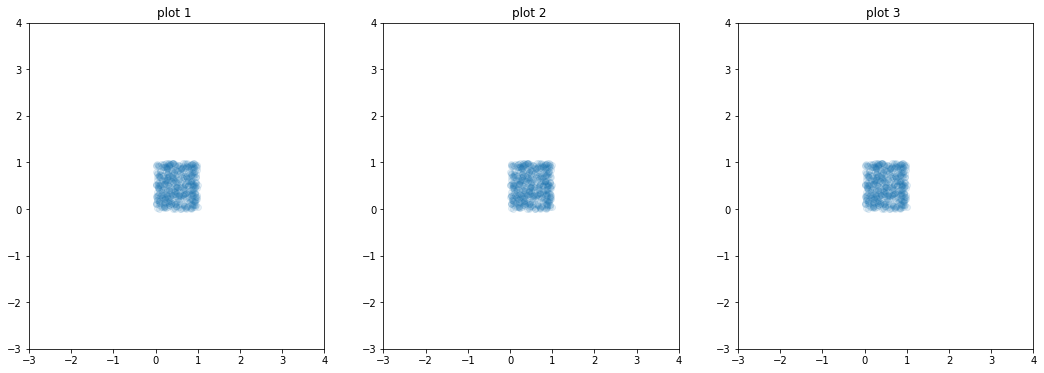

In [21]:
ndim=2
nwalkers=500

rand_pos = numpy.random.uniform(size=(nwalkers, ndim))


plt.figure(figsize=(18,6))

for i, nsteps in enumerate([10,100,500]):
    position=numpy.zeros((2,nwalkers))
    
    for j in range(0,nwalkers):
        for k in range(0,ndim):
            all_pos = numpy.zeros((1,nsteps+1))
            w=walker(rand_pos[j,k] , ndim=1 , step_size = 0.05)
            track = w.doSteps(nsteps).T
            all_pos[0] = numpy.array(track)
            position[k,j] = all_pos[0,-1]
    plt.subplot(131+i)
    plt.xlim((-3, 4))
    plt.ylim((-3, 4))
    plt.title("plot {} ".format(i+1))    
    plt.scatter(rand_pos[:,0], rand_pos[:,1], alpha=0.1)